# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [ ]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [13]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE

def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    
    ile = np.random.poisson(intensity * (x_lim[1] - x_lim[0]) * (y_lim[1] - y_lim[0]))
    points_arr = np.zeros((ile,2))
    
    for i in range(ile):
        points_arr[i] = [np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0], np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]]
        
    return pd.DataFrame(points_arr, columns = ["X", "Y"])


def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    
    dx = (x_lim[1] - x_lim[0])/grid[0]
    dy = (y_lim[1] - y_lim[0])/grid[1]
    
    x0 = dx/2
    y0 = dy/2
    
    points_arr = np.zeros((grid[0]*grid[1],2))
    
    for i in range(grid[0]):
        for j in range(grid[1]):
            points_arr[i * grid[1] + j] = [i * dx + dx/2 + (np.random.rand() - 0.5) * dx, j * dy + dy/2 + (np.random.rand() - 0.5) * dy]
    
    return pd.DataFrame(points_arr, columns = ["X", "Y"])


def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    
    parent_count = np.random.poisson(parent_intensity * x_lim[1] * y_lim[1])
    
    points = pd.DataFrame(columns = ["X", "Y"])
    
    for i in range(parent_count):
        
        center = [np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0], np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]]
        daughter_count = np.random.poisson(daughter_intensity * np.pi ** 2 * cluster_radius)
        
        for j in range(daughter_count):
            
            r = cluster_radius * np.random.rand()
            a = np.random.rand() * 2 * np.pi
            
            x_rel = r * np.cos(a)
            y_rel = r * np.sin(a)
            
            x_abs = center[0] + x_rel
            y_abs = center[1] + y_rel
            
            if x_abs <= x_lim[1] and x_abs >= x_lim[0] and y_abs <= y_lim[1] and y_abs >= y_lim[0]:
                
                points.loc[len(points)] = [x_abs, y_abs]
                
    return points

#raise NotImplementedError()

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [14]:
# YOUR CODE HERE

hp = homogeneous_poisson_on_rectangle(2.5, [0,10], [0,10])
r = regular_on_rectangle([15,15], 0.75, [0,10], [0,10])
m = materna_on_rectangle(0.3, 5, 0.75, [0,10], [0,10])

#raise NotImplementedError()

### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [28]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    # YOUR CODE HERE
    
    odl = np.zeros(len(points))
    
    for i in range(len(points)):
        d = np.sqrt((points["X"][i] - points["X"])**2 + (points["Y"][i] - points["Y"])**2)
        d = np.sort(d)
        odl[i] = d[1]
        
    du = np.unique(odl)
    g = np.zeros(len(du))
    
    for i in range(len(du)):
        x = 0
        for j in range(len(odl)):
            if du[i] > odl[j]:
                x += 1
        g[i] = x
    
    g = g/max(g)
        
    return pd.DataFrame({"D": du, "G": g})
    
    #raise NotImplementedError()
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    
    g = 1 - np.exp(-np.pi * intensity * d**2)
    return pd.DataFrame({"D": d, "G": g})
    
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [29]:
# YOUR CODE HERE

ghp = g_function(hp)
gthp = g_function_poisson(ghp["D"], 2.5)

gr = g_function(r)
gtr = g_function_poisson(gr["D"], 2.5)

gm = g_function(m)
gtm = g_function_poisson(ghp["D"], 2.5)

#raise NotImplementedError()

#### c) Wizualizacja

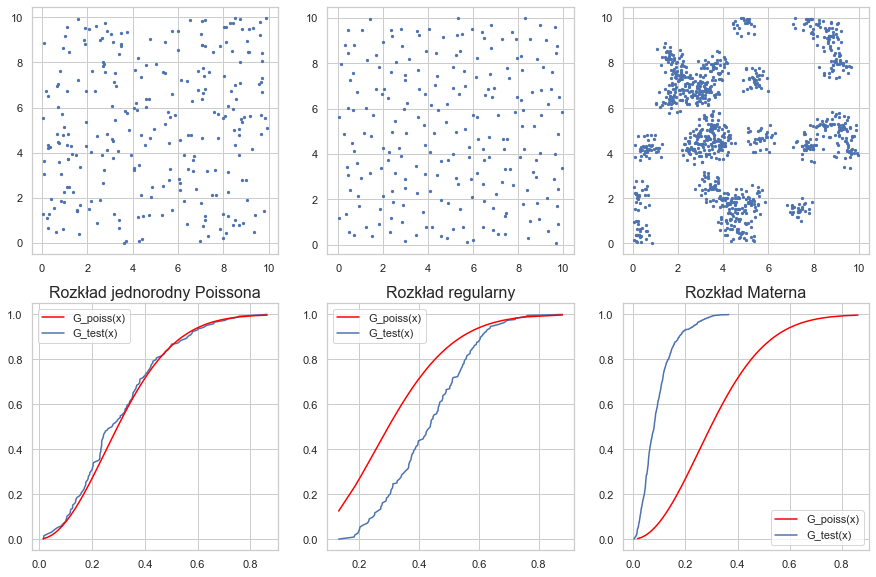

In [32]:
# YOUR CODE HERE

lab_gt = "G_poiss(x)"
lab_g = "G_test(x)"

fig, axs = plt.subplots(2, 3, figsize = (15,10))

axs[0,0].scatter(hp["X"], hp["Y"], s = 5)
axs[0,1].scatter(r["X"], r["Y"], s = 5)
axs[0,2].scatter(m["X"], m["Y"], s = 5)

axs[1,0].plot(ghp["D"], ghp["G"], label = lab_g)
axs[1,1].plot(gr["D"], gr["G"], label = lab_g)
axs[1,2].plot(gm["D"], gm["G"], label = lab_g)

axs[1,0].plot(gthp["D"], gthp["G"], color = "red", label = lab_gt)
axs[1,1].plot(gtr["D"], gtr["G"], color = "red", label = lab_gt)
axs[1,2].plot(gtm["D"], gtm["G"], color = "red", label = lab_gt)

axs[1,0].set_title("Rozkład jednorodny Poissona", size = 16)
axs[1,1].set_title("Rozkład regularny", size = 16)
axs[1,2].set_title("Rozkład Materna", size = 16)

for i in range(3):
    handles, labels = axs[1,i].get_legend_handles_labels()
    axs[1,i].legend(handles[::-1], labels[::-1])

#raise NotImplementedError()

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [35]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    # YOUR CODE HERE
    
    odl = np.zeros(len(points))
    
    for i in range(len(points)):
        d = np.sqrt((points["X"][i] - test_points["X"])**2 + (points["Y"][i] - test_points["Y"])**2)
        d = np.sort(d)
        odl[i] = d[0]
        
    du = np.unique(odl)
    f = np.zeros(len(du))
    
    for i in range(len(du)):
        x = 0
        for j in range(len(odl)):
            if du[i] > odl[j]:
                x += 1
        f[i] = x
    
    f = f/max(f)
        
    return pd.DataFrame({"D": du, "F": f})
    
    #raise NotImplementedError()
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    
    f = 1 - np.exp(-np.pi * intensity * d**2)
    return pd.DataFrame({"D": d, "F": f})
    
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [37]:
# YOUR CODE HERE

hp_teor = homogeneous_poisson_on_rectangle(2.5, [0,10], [0,10])

fhp = f_function(hp_teor, hp)
fthp = f_function_poisson(fhp["D"], 2.5)

fr = f_function(hp_teor, r)
ftr = f_function_poisson(fr["D"], 2.5)

fm = f_function(hp_teor, m)
ftm = f_function_poisson(fhp["D"], 2.5)

#raise NotImplementedError()

#### c) Wizualizacja

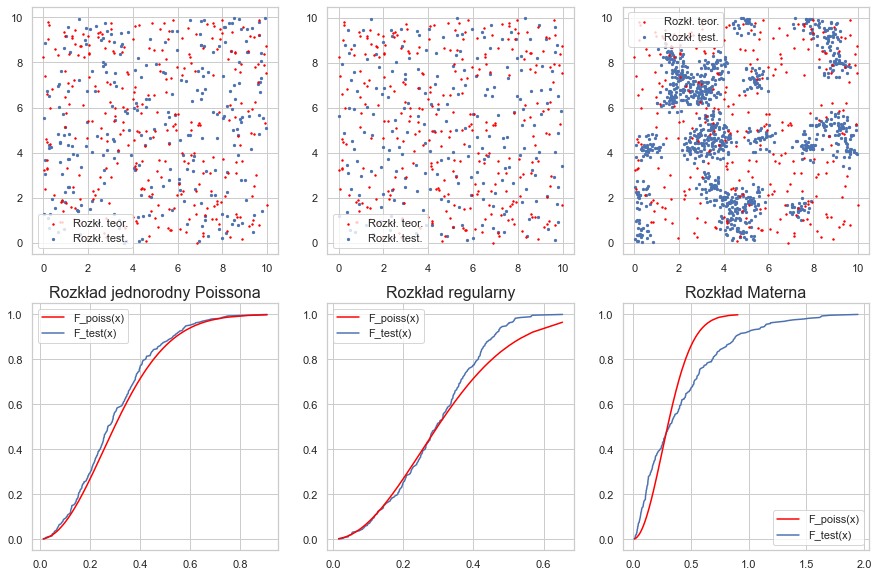

In [46]:
# YOUR CODE HERE

lab_gt = "F_poiss(x)"
lab_g = "F_test(x)"
lab_teor = "Rozkł. teor."
lab_test = "Rozkł. test."

fig, axs = plt.subplots(2, 3, figsize = (15,10))

axs[0,0].scatter(hp["X"], hp["Y"], s = 5, label = lab_test)
axs[0,1].scatter(r["X"], r["Y"], s = 5, label = lab_test)
axs[0,2].scatter(m["X"], m["Y"], s = 5, label = lab_test)

axs[0,0].scatter(hp_teor["X"], hp_teor["Y"], s = 2, color = "red", label = lab_teor)
axs[0,1].scatter(hp_teor["X"], hp_teor["Y"], s = 2, color = "red", label = lab_teor)
axs[0,2].scatter(hp_teor["X"], hp_teor["Y"], s = 2, color = "red", label = lab_teor)

axs[1,0].plot(fhp["D"], fhp["F"], label = lab_g)
axs[1,1].plot(fr["D"], fr["F"], label = lab_g)
axs[1,2].plot(fm["D"], fm["F"], label = lab_g)

axs[1,0].plot(fthp["D"], fthp["F"], color = "red", label = lab_gt)
axs[1,1].plot(ftr["D"], ftr["F"], color = "red", label = lab_gt)
axs[1,2].plot(ftm["D"], ftm["F"], color = "red", label = lab_gt)

axs[1,0].set_title("Rozkład jednorodny Poissona", size = 16)
axs[1,1].set_title("Rozkład regularny", size = 16)
axs[1,2].set_title("Rozkład Materna", size = 16)

for i in range(2):
    for j in range(3):
        handles, labels = axs[i,j].get_legend_handles_labels()
        axs[i,j].legend(handles[::-1], labels[::-1])

#raise NotImplementedError()